## 3 digits - Merging year and country wise

### Waves 4,5,6

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/data_clean_w456.csv"
)
indexes = pd.read_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/work_quality_indexes_year_country.csv"
)

In [3]:
def convert_to_3_digits(number):
    return int(str(number)[:-1]) if number >= 1000 else number


df["isco"] = df["isco"].apply(lambda x: convert_to_3_digits(x))
indexes["isco"] = indexes["isco"].apply(lambda x: convert_to_3_digits(x))

In [4]:
df = df.merge(indexes, on=["year", "country", "isco"], how="inner")

In [5]:
df

,mergeid,wave,year,age,nb_children,nb_grandchildren,partnerinhh,job_status,industry,thinc,...,jqi_working_time_quality,jqi_monthly_earnings_weighted,jqi_skills_discretion_weighted,jqi_social_environment_weighted,jqi_physical_environment_weighted,jqi_intensity_weighted,jqi_prospects_weighted,jqi_working_time_quality_weighted,jqi_sum,jqi_sum_weighted
0,AT-009376-01,4,2011,53.0,2.0,0.0,1,Civil servant,"Transport, storage and communication",44043.460938,...,99.375000,2255.757532,99.866122,107.927235,125.510628,59.873372,89.017043,142.426610,439.946788,554.498349
1,AT-009376-01,4,2011,53.0,2.0,0.0,1,Civil servant,"Transport, storage and communication",44040.132812,...,99.375000,2255.757532,99.866122,107.927235,125.510628,59.873372,89.017043,142.426610,439.946788,554.498349
2,AT-009376-01,4,2011,53.0,2.0,0.0,1,Civil servant,"Transport, storage and communication",44062.519531,...,99.375000,2255.757532,99.866122,107.927235,125.510628,59.873372,89.017043,142.426610,439.946788,554.498349
3,AT-009376-01,4,2011,53.0,2.0,0.0,1,Civil servant,"Transport, storage and communication",44175.187500,...,99.375000,2255.757532,99.866122,107.927235,125.510628,59.873372,89.017043,142.426610,439.946788,554.498349
4,AT-009376-01,4,2011,53.0,2.0,0.0,1,Civil servant,"Transport, storage and communication",44040.937500,...,99.375000,2255.757532,99.866122,107.927235,125.510628,59.873372,89.017043,142.426610,439.946788,554.498349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95080,SI-974683-01,6,2015,57.0,2.0,2.0,1,Public sector employee,Manufacturing,9036.213867,...,91.523438,383.575878,18.783260,35.997276,36.763208,25.365239,18.383376,42.851541,338.156033,213.279745
95081,SI-974683-01,6,2015,57.0,2.0,2.0,1,Public sector employee,Manufacturing,11131.281250,...,91.523438,383.575878,18.783260,35.997276,36.763208,25.365239,18.383376,42.851541,338.156033,213.279745
95082,SI-974683-01,6,2015,57.0,2.0,2.0,1,Public sector employee,Manufacturing,9359.002930,...,91.523438,383.575878,18.783260,35.997276,36.763208,25.365239,18.383376,42.851541,338.156033,213.279745
95083,SI-974683-01,6,2015,57.0,2.0,2.0,1,Public sector employee,Manufacturing,11720.915039,...,91.523438,383.575878,18.783260,35.997276,36.763208,25.365239,18.383376,42.851541,338.156033,213.279745


In [6]:
df.mergeid.nunique()

5687

In [7]:
df.groupby("country").mergeid.nunique()

country
Austria           313
Belgium           792
Czech Republic    398
Denmark           464
Estonia           702
France            409
Germany           734
Italy             502
Slovenia          351
Spain             701
Switzerland       321
Name: mergeid, dtype: int64

In [8]:
df.groupby("year").mergeid.nunique()

year
2011    2724
2013    3231
2015    3747
Name: mergeid, dtype: int64

In [9]:
df.to_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/3digits_w456_year_country.csv",
    index=False,
)

### Some descriptive stats

In [10]:
round(df[["age", "gender", "nb_children", "yrseducation"]].describe(), 2)

,age,gender,nb_children,yrseducation
count,95085.00,95085.00,95085.00,95085.00
mean,56.39,0.53,1.79,13.08
std,3.16,0.50,1.27,4.25
min,50.00,0.00,0.00,0.00
25%,54.00,0.00,1.00,11.00
50%,56.00,1.00,2.00,13.00
75%,59.00,1.00,2.00,16.00
max,65.00,1.00,10.00,39.00


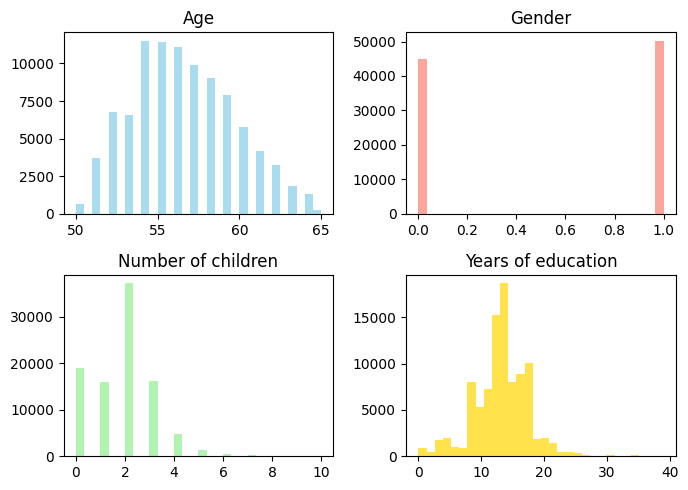

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(7, 5))

axs[0, 0].hist(df["age"], bins=30, color="skyblue", alpha=0.7)
axs[0, 0].set_title("Age")

axs[0, 1].hist(df["gender"], bins=30, color="salmon", alpha=0.7)
axs[0, 1].set_title("Gender")

axs[1, 0].hist(df["nb_children"], bins=30, color="lightgreen", alpha=0.7)
axs[1, 0].set_title("Number of children")

axs[1, 1].hist(df["yrseducation"], bins=30, color="gold", alpha=0.7)
axs[1, 1].set_title("Years of education")

plt.tight_layout()

plt.show()

In [12]:
round(df["job_status"].value_counts(normalize=True), 2)

job_status
Private sector employee    0.37
Public sector employee     0.23
Employee                   0.22
Self-employed              0.13
Civil servant              0.06
Name: proportion, dtype: float64

In [13]:
round(
    df[
        ["yrscontribution", "retirement_age", "work_horizon", "work_horizon_change"]
    ].describe(),
    2,
)

,yrscontribution,retirement_age,work_horizon,work_horizon_change
count,95085.00,95085.00,95085.00,95085.00
mean,35.95,63.43,7.05,0.19
std,6.01,2.15,3.43,0.51
min,6.00,57.00,0.08,0.00
25%,33.00,62.00,4.08,0.00
50%,36.00,65.00,7.00,0.00
75%,40.00,65.00,10.00,0.08
max,55.00,68.00,17.00,4.00


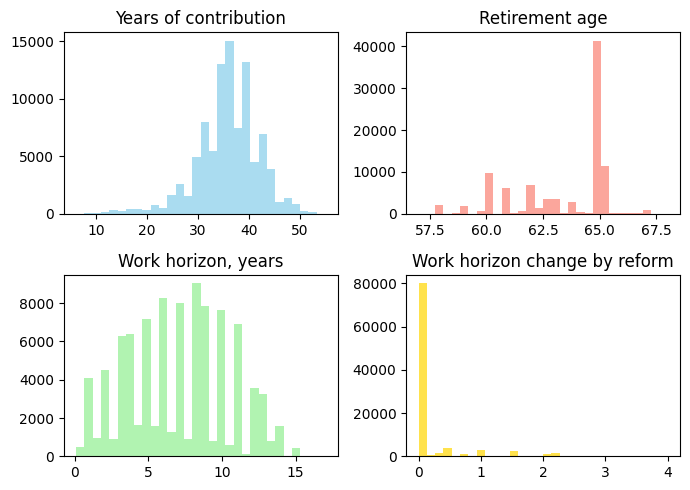

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(7, 5))

axs[0, 0].hist(df["yrscontribution"], bins=30, color="skyblue", alpha=0.7)
axs[0, 0].set_title("Years of contribution")

axs[0, 1].hist(df["retirement_age"], bins=30, color="salmon", alpha=0.7)
axs[0, 1].set_title("Retirement age")

axs[1, 0].hist(df["work_horizon"], bins=30, color="lightgreen", alpha=0.7)
axs[1, 0].set_title("Work horizon, years")

axs[1, 1].hist(df["work_horizon_change"], bins=30, color="gold", alpha=0.7)
axs[1, 1].set_title("Work horizon change by reform")

plt.tight_layout()

plt.show()

In [15]:
round(df["eurodcat"].value_counts(normalize=True), 2)

eurodcat
0    0.81
1    0.19
Name: proportion, dtype: float64

In [16]:
df["eurod"].value_counts()

eurod
0.0     24720
1.0     23320
2.0     17060
3.0     11940
4.0      7985
5.0      4675
6.0      2655
7.0      1585
8.0       620
9.0       340
10.0      150
11.0       35
Name: count, dtype: int64

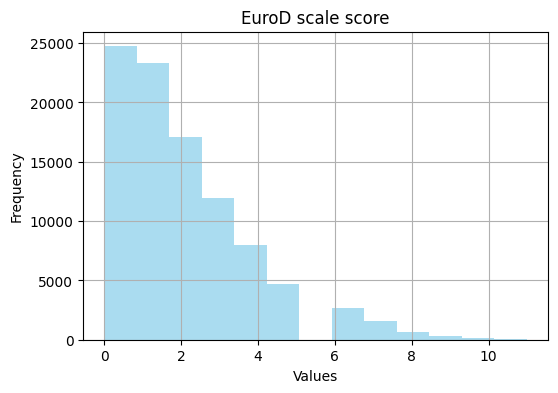

In [17]:
plt.figure(figsize=(6, 4))
plt.hist(df["eurod"], bins=13, color="skyblue", alpha=0.7)
plt.title("EuroD scale score")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [18]:
round(
    df[
        [
            "jqi_monthly_earnings",
            "jqi_skills_discretion",
            "jqi_social_environment",
            "jqi_physical_environment",
            "jqi_intensity",
            "jqi_prospects",
            "jqi_working_time_quality",
        ]
    ].describe(),
    2,
)

,jqi_monthly_earnings,jqi_skills_discretion,jqi_social_environment,jqi_physical_environment,jqi_intensity,jqi_prospects,jqi_working_time_quality
count,95085.00,95085.00,95085.00,95085.00,95085.00,95085.00,95085.00
mean,1568.00,59.88,80.48,84.43,50.61,59.53,87.65
std,698.24,15.18,8.06,10.28,9.62,14.47,11.53
min,39.50,2.33,37.50,25.64,11.63,0.00,7.25
25%,1102.61,48.23,75.39,78.97,44.60,50.00,82.17
50%,1459.46,60.52,80.68,87.50,50.70,60.24,90.62
75%,1875.79,72.20,86.00,91.94,56.20,68.75,96.54
max,12267.43,97.47,100.00,100.00,88.37,100.00,100.00


### Waves 4,5,6 common individuals

In [19]:
df.mergeid.nunique()

5687

In [20]:
unique_mergeid_w4 = set(df[df.wave == 4]["mergeid"].unique())
unique_mergeid_w5 = set(df[df.wave == 5]["mergeid"].unique())
unique_mergeid_w6 = set(df[df.wave == 6]["mergeid"].unique())
intersection_ids = unique_mergeid_w4.intersection(unique_mergeid_w5).intersection(
    unique_mergeid_w6
)
len(intersection_ids)

1046

In [21]:
w456_common = df[df["mergeid"].isin(intersection_ids)].reset_index(drop=True)

isco = w456_common["isco"].value_counts().to_frame().reset_index()
isco = isco[isco["count"] >= 10]
w456_common = w456_common[w456_common["isco"].isin(isco["isco"].unique())].reset_index(
    drop=True
)

In [22]:
w456_common.groupby("country").mergeid.nunique()

country
Austria            83
Belgium           213
Czech Republic     67
Denmark           118
Estonia           182
France            128
Germany            21
Italy              75
Slovenia           68
Spain              91
Name: mergeid, dtype: int64

In [23]:
# Delete Germany as too few individuals
w456_common = w456_common[w456_common.country != "Germany"].reset_index(drop=True)

In [24]:
w456_common.to_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/3digits_w456_year_country_common.csv",
    index=False,
)

### Waves 4 and 6

In [25]:
result = (
    df[df["year"].isin([2013, 2015])]
    .groupby("mergeid")["work_horizon_change"]
    .sum()
    .reset_index()
)
result["year"] = 2015

df = df.drop(columns="work_horizon_change")
df = df.merge(result, on=["mergeid", "year"], how="left")

df["work_horizon_change"] = df["work_horizon_change"].fillna(0)

In [26]:
w46 = df[(df.wave == 4) | (df.wave == 6)].reset_index(drop=True)

In [27]:
w46.mergeid.nunique()

5143

In [28]:
w46.groupby("country").mergeid.nunique()

country
Austria           304
Belgium           715
Czech Republic    362
Denmark           424
Estonia           678
France            394
Germany           585
Italy             455
Slovenia          327
Spain             578
Switzerland       321
Name: mergeid, dtype: int64

In [29]:
w46.groupby("wave").mergeid.nunique()

wave
4    2724
6    3747
Name: mergeid, dtype: int64

In [30]:
w46.to_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/3digits_w46_year_country.csv",
    index=False,
)

### Waves 4 and 6 common individuals

In [31]:
unique_mergeid_w4 = set(w46[w46.wave == 4]["mergeid"].unique())
unique_mergeid_w6 = set(w46[w46.wave == 6]["mergeid"].unique())
intersection_ids = unique_mergeid_w4.intersection(unique_mergeid_w6)
len(intersection_ids)

1328

In [32]:
w46_common = w46[w46["mergeid"].isin(intersection_ids)].reset_index(drop=True)

In [33]:
w46_common.groupby("country").mergeid.nunique()

country
Austria           111
Belgium           263
Czech Republic     99
Denmark           130
Estonia           243
France            156
Germany            28
Italy             101
Slovenia           86
Spain             111
Name: mergeid, dtype: int64

In [34]:
# Delete Germany as too few individuals
w456_common = w456_common[w456_common.country != "Germany"].reset_index(drop=True)

In [35]:
w46_common.to_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/3digits_w46_year_country_common.csv",
    index=False,
)